In [78]:
import math

from scipy.io import arff
from operator import index

import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import NearestNeighbors, KernelDensity
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import scipy.stats
from scipy.stats import expon, skew
from scipy import integrate
import seaborn as sns
import math
plt.rcParams['figure.figsize'] = [15, 7]

# 1

In [79]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t4-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df = pd.DataFrame(arff_file[0])

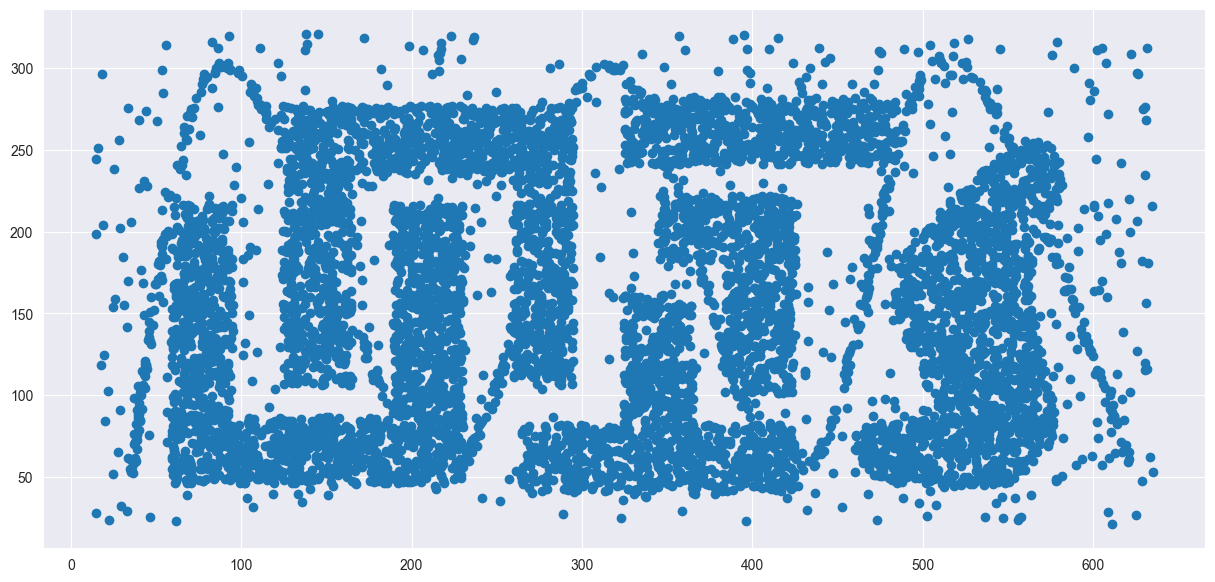

In [80]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.show()

In [81]:
X = df.iloc[:,:2].values
y = df.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [82]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum': # min + median + max
            arr += [x[1]+np.max(x)+np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'max2':
            arr += [x[-1]+x[-2]]
        elif median == 'medMax':
            arr += [np.median(x)+np.max(x)]
        elif median == 'min':
            arr += [x[1]]
            

    return arr

distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")

4.64566683234964


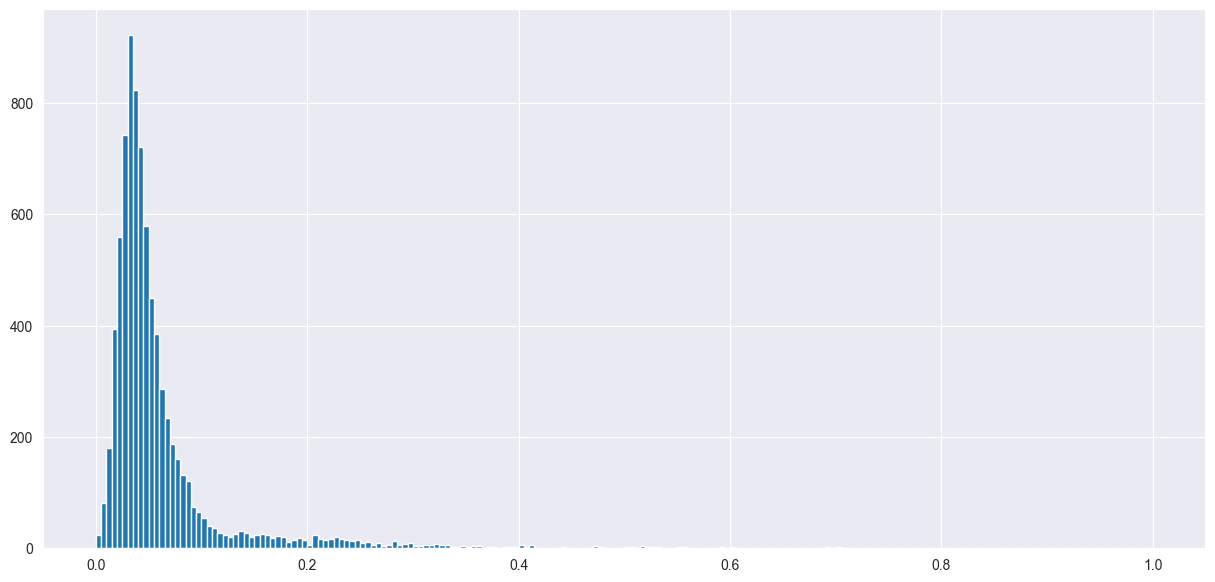

In [83]:
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
print(skew(arr))
plt.hist(arr,bins=200)
plt.show()

In [84]:
means = np.mean(arr)
inMean = 1/means

In [85]:
posNeg1 = []
spaceStep1 = np.linspace(.7,.99,20)
for e in spaceStep1:
    ker = -means*np.log(1-e)
    print(-means*np.log(1-.88))
    f = integrate.quad(lambda x: inMean*np.exp(-x*inMean), 0, ker)
    newArr = arr > ker
    print(f)
    posNeg1.append([((y[newArr] == 6).sum() / (((y == 6).sum()))), ((y[newArr] != 6).sum() / ((y != 6).sum()))])

print(posNeg1)

0.1311881176869189
(0.7000000000000001, 7.771561172376096e-15)
0.1311881176869189
(0.7152631578947368, 7.941016265608357e-15)
0.1311881176869189
(0.7305263157894737, 8.110471358840617e-15)
0.1311881176869189
(0.7457894736842106, 8.279926452072878e-15)
0.1311881176869189
(0.7610526315789472, 8.449381545305137e-15)
0.1311881176869189
(0.7763157894736841, 8.618836638537398e-15)
0.1311881176869189
(0.7915789473684209, 8.788291731769659e-15)
0.1311881176869189
(0.806842105263158, 8.957746825001923e-15)
0.1311881176869189
(0.8221052631578946, 9.127201918234179e-15)
0.1311881176869189
(0.8373684210526317, 9.296657011466443e-15)
0.1311881176869189
(0.8526315789473685, 9.466112104698704e-15)
0.1311881176869189
(0.8678947368421053, 9.635567197930963e-15)
0.1311881176869189
(0.8831578947368423, 9.805022291163226e-15)
0.1311881176869189
(0.8984210526315789, 9.974477384395485e-15)
0.1311881176869189
(0.9136842105263159, 1.0143932477627747e-14)
0.1311881176869189
(0.9289473684210525, 1.0313387570860

[False False False ... False False False]


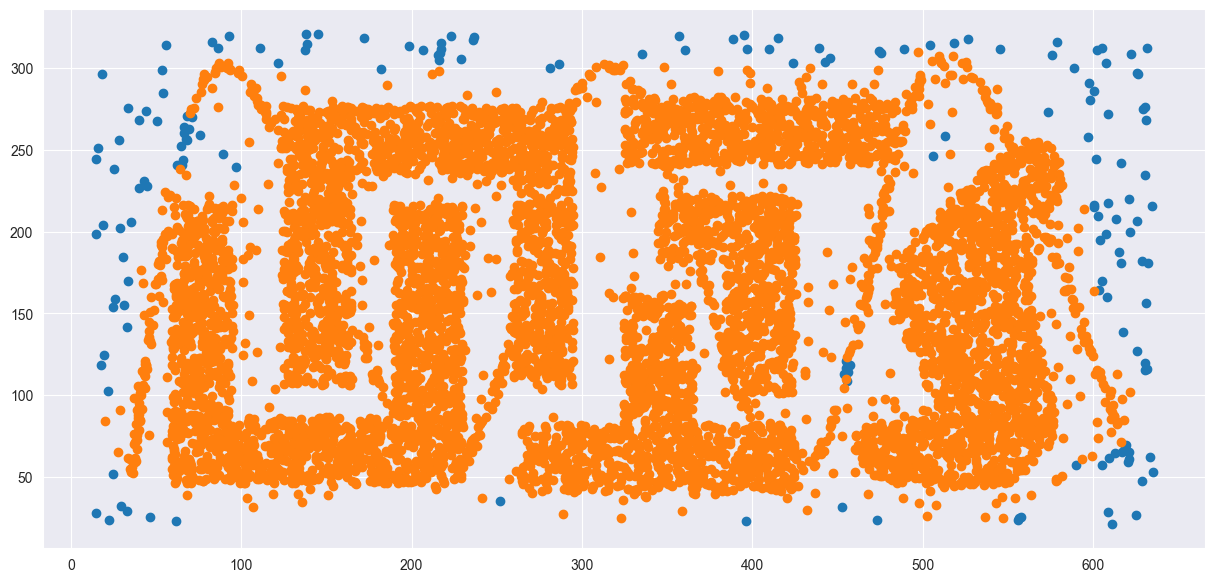

In [86]:

print(newArr)
plt.scatter(X[newArr,0],X[newArr,1])
plt.scatter(X[~newArr,0],X[~newArr,1])
plt.show()

(170, 2) (7830, 2)
594 7236


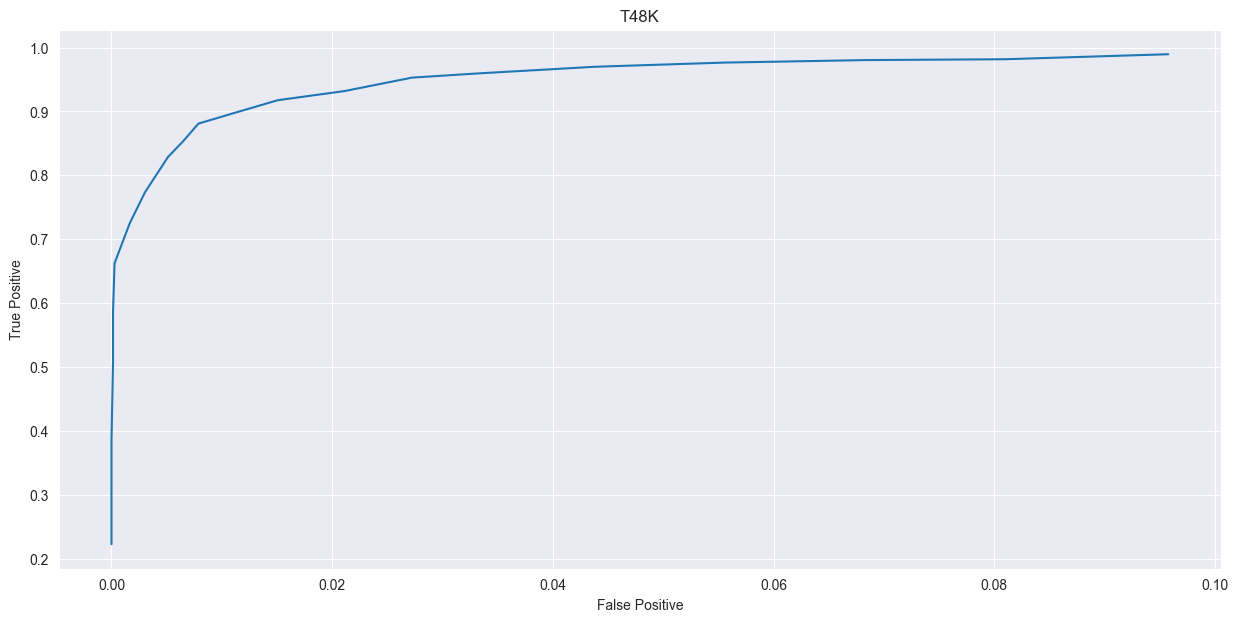

-0.09084440725401496


In [87]:
print(X[newArr].shape,X[~newArr].shape)
print((y[~newArr] == 6).sum(),(y[~newArr] != 6).sum())
posNeg1 = np.array(posNeg1)
plt.plot(posNeg1[:,1],posNeg1[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("T48K")
plt.show()
print(integrate.trapezoid(posNeg1[:,0],posNeg1[:,1]))

In [88]:
total2 = integrate.trapezoid(posNeg1[:,0], x=posNeg1[:,1] / (posNeg1[0][0]*posNeg1[0][1])) * -100
print(total2)
# 525254.5 / 550420 = 95.43

95.85948296265758


# 1

# 2

In [89]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t7-10k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()

,x,y,CLASS
9995,451.783997,372.544006,b'6'
9996,550.674988,327.447998,b'1'
9997,474.742004,161.518005,b'3'
9998,535.835022,375.765991,b'1'
9999,234.878006,181.878006,b'8'


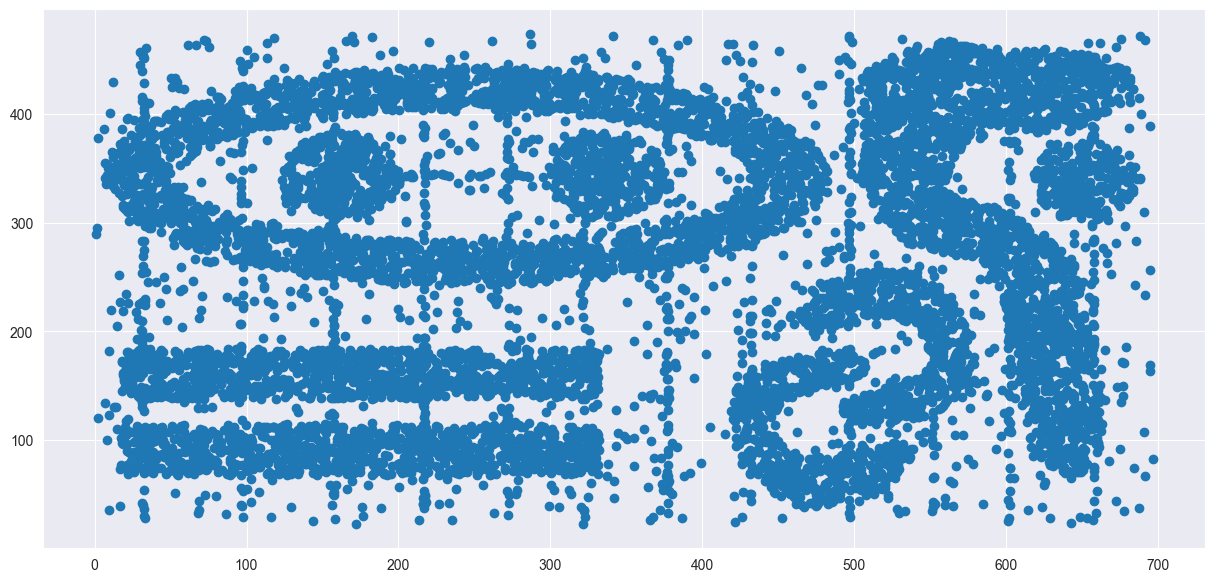

In [90]:
plt.scatter(df3['x'],df3['y'])
plt.show()

In [91]:
X = df3.iloc[:,:2].values
y = df3.iloc[:,2].values
le = LabelEncoder()
y = le.fit_transform(y)
def main(X,y,n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

knn, distReturn = main(X,y,35)

In [92]:
def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

0.25083038066882507
(0.7, 7.771561172376096e-15)
0.25083038066882507
(0.7152631578947368, 7.941016265608357e-15)
0.25083038066882507
(0.7305263157894738, 8.110471358840619e-15)
0.25083038066882507
(0.7457894736842104, 8.279926452072877e-15)
0.25083038066882507
(0.7610526315789472, 8.449381545305137e-15)
0.25083038066882507
(0.7763157894736841, 8.618836638537398e-15)
0.25083038066882507
(0.7915789473684212, 8.78829173176966e-15)
0.25083038066882507
(0.8068421052631578, 8.95774682500192e-15)
0.25083038066882507
(0.8221052631578947, 9.12720191823418e-15)
0.25083038066882507
(0.8373684210526315, 9.296657011466442e-15)
0.25083038066882507
(0.8526315789473684, 9.466112104698702e-15)
0.25083038066882507
(0.8678947368421054, 9.635567197930965e-15)
0.25083038066882507
(0.8831578947368421, 9.805022291163226e-15)
0.25083038066882507
(0.8984210526315789, 9.974477384395485e-15)
0.25083038066882507
(0.9136842105263159, 1.0143932477627747e-14)
0.25083038066882507
(0.9289473684210525, 1.03133875708600

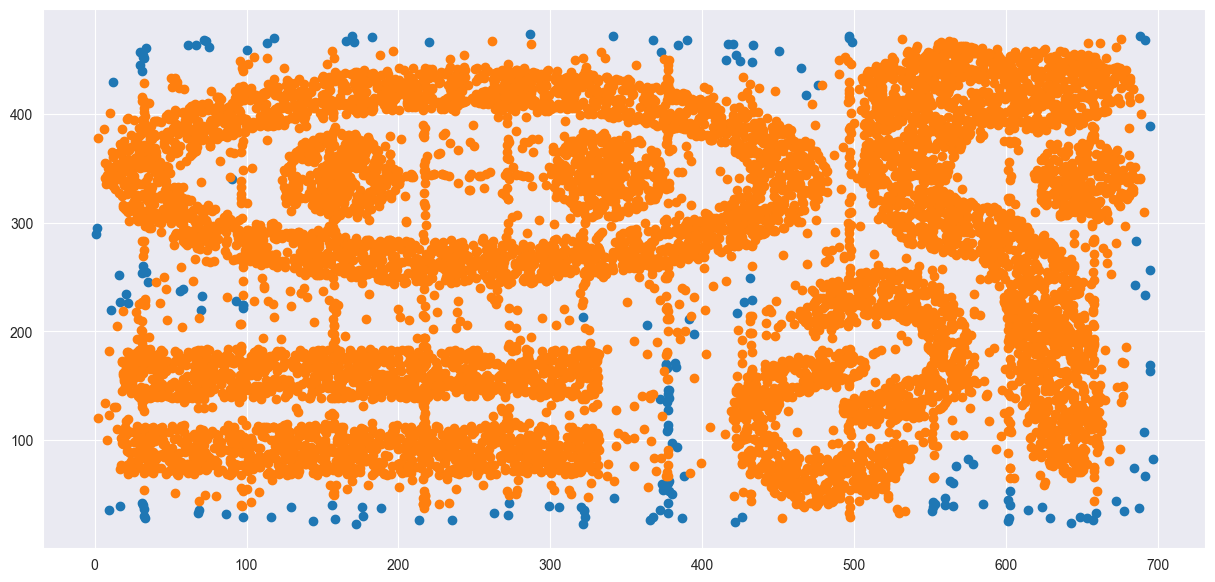

In [93]:
means = np.mean(arr)
inMean = 1 / means
posNeg = []
spaceStep = np.linspace(.7,.99,20)
for e in spaceStep:
    ker = -means * np.log(1 - e)
    print(-means * np.log(1 - .88))
    f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
    print(f)
    newArr = arr > ker
    posNeg.append([((y[newArr] == 9).sum() / (((y == 9).sum()))), ((y[newArr] != 9).sum() / ((y != 9).sum()))])
    y.max()

print(newArr)
print(posNeg)
plt.scatter(X[newArr, 0], X[newArr, 1])
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.show()

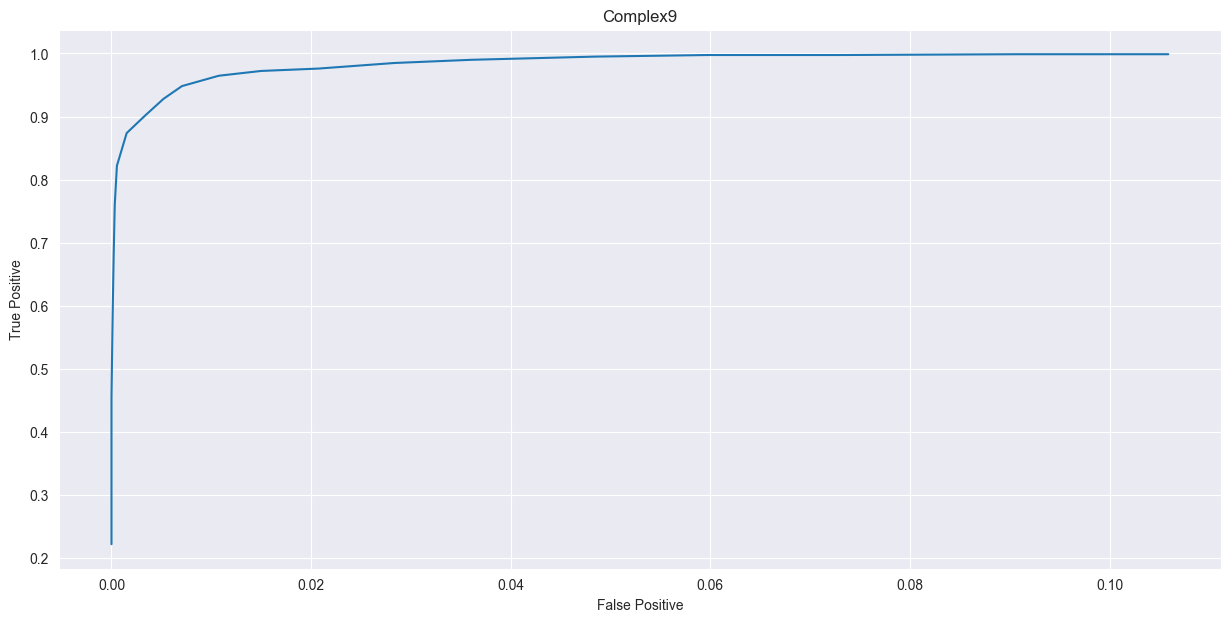

-0.10417736224100256


In [94]:
posNeg = np.array(posNeg)
plt.plot(posNeg[:,1], posNeg[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Complex9")
plt.show()
print(integrate.trapezoid(posNeg[:,0], x=posNeg[:,1]))

In [95]:
total2 = integrate.trapezoid(posNeg[:,0], x=posNeg[:,1] / (posNeg[0][0]*posNeg[0][1])) * -100
print(total2)
#824456
#~= 98.3%

98.51055139550714


# 2

# 3

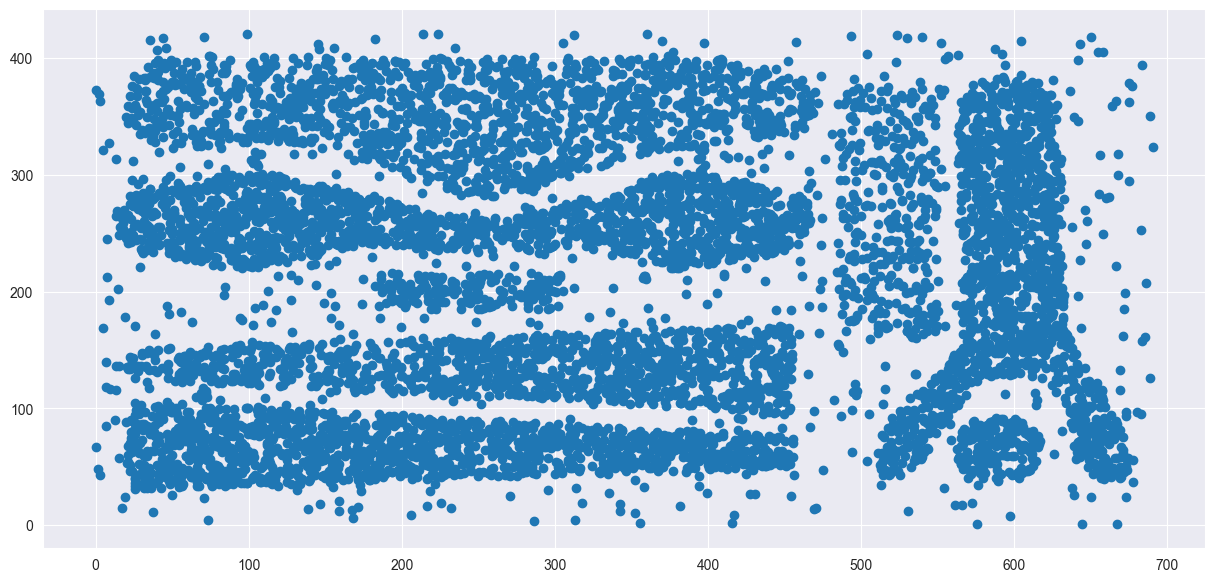

[False False False ... False False False]
[[0.9907120743034056, 0.1634753158785984], [0.9876160990712074, 0.13872606486908948], [0.978328173374613, 0.11658199817637098], [0.9752321981424149, 0.09456819069949199], [0.9721362229102167, 0.07489904910772437], [0.9628482972136223, 0.05913768399114237], [0.9535603715170279, 0.047153836133906474], [0.9473684210526315, 0.035039729060831054], [0.934984520123839, 0.02657288003126221], [0.913312693498452, 0.019017845512570013], [0.8947368421052632, 0.013546958447310147], [0.8761609907120743, 0.009118145108766445], [0.8575851393188855, 0.006773479223655073], [0.8235294117647058, 0.004168294906864661], [0.7863777089783281, 0.0024749251009508924], [0.7337461300309598, 0.0014328513742347272], [0.6749226006191951, 0.0007815552950371239], [0.5975232198142415, 0.0], [0.47058823529411764, 0.0], [0.2786377708978328, 0.0]]


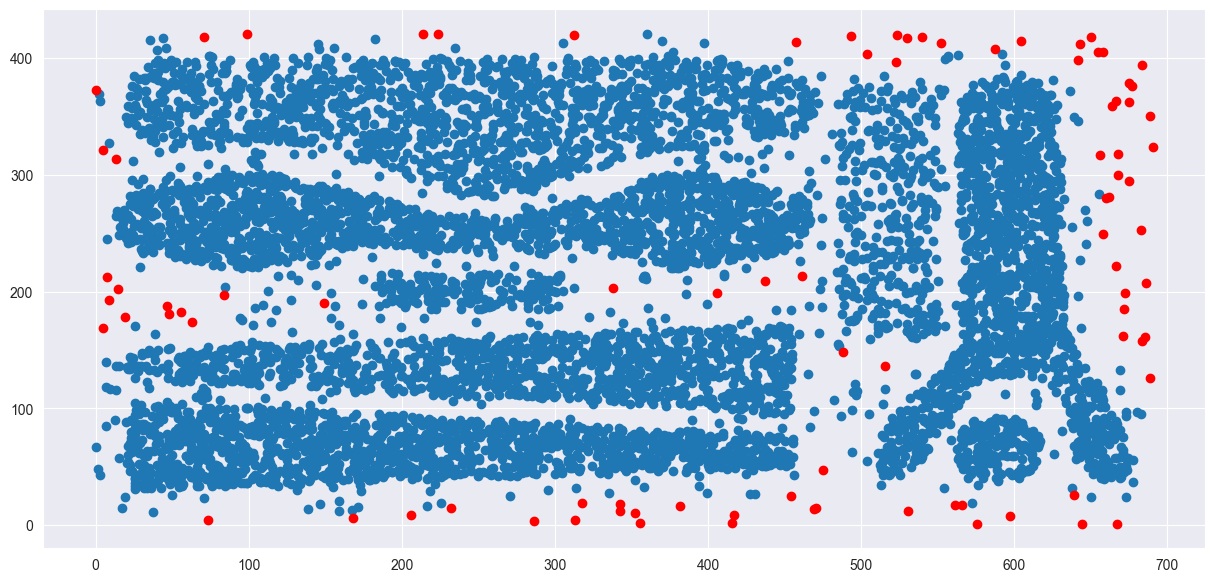

In [96]:
arff_file = arff.loadarff('./clusters/artificial/cluto-t8-8k.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df3 = pd.DataFrame(arff_file[0])
df3.tail()
plt.scatter(df3['x'], df3['y'])
plt.show()
X = df3.iloc[:, :2].values
y = df3.iloc[:, 2].values
le = LabelEncoder()
y = le.fit_transform(y)


def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist


knn, distReturn = main(X, y, 10)


def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr


distReturn = np.array(distReturn)
arr = generateArr(distReturn, median="medMax")
arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
means = np.mean(arr)
inMean = 1 / means
posNeg2 = []
spaceStep2 = np.linspace(.7,.99,20)
for e in spaceStep2:
    ker = -means * np.log(1 - e)
    f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
    newArr = arr > ker
    posNeg2.append([((y[newArr] == 8).sum() / (((y == 8).sum()))), ((y[newArr] != 8).sum() / ((y != 8).sum()))])
    
print(newArr)
print(posNeg2)
plt.scatter(X[~newArr, 0], X[~newArr, 1])
plt.scatter(X[newArr, 0], X[newArr, 1],color='red')
plt.show()

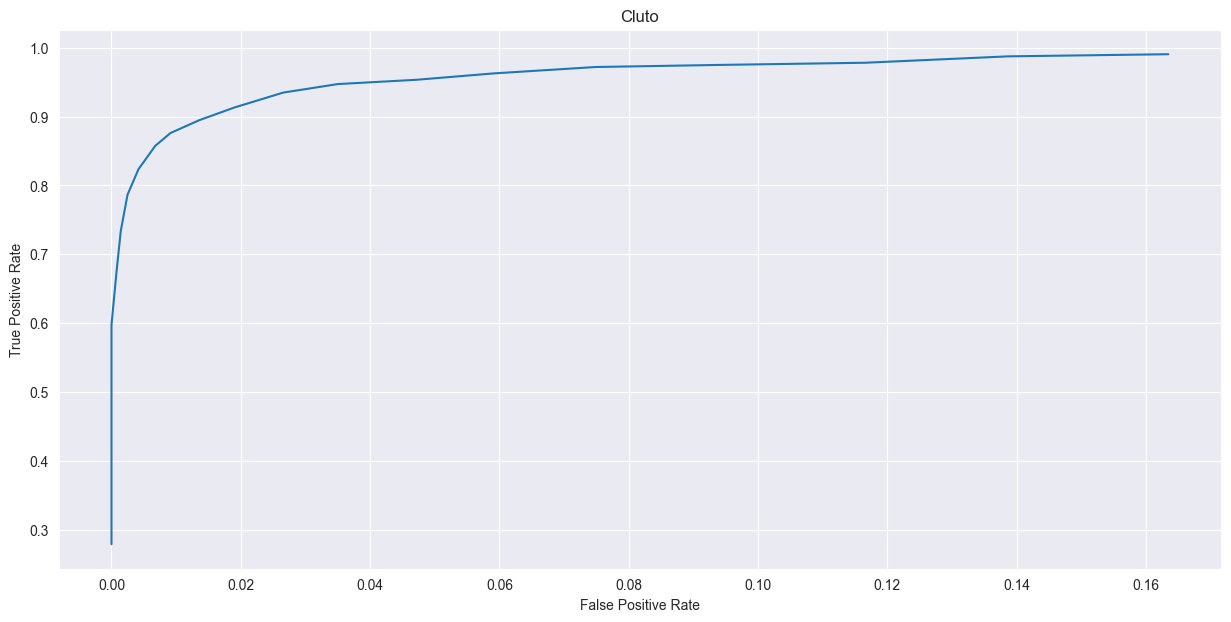

-0.15629976718685662


In [97]:
posNeg2 = np.array(posNeg2)
plt.plot(posNeg2[:,1], posNeg2[:,0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Cluto")
plt.show()
print(integrate.trapezoid(posNeg2[:,0], x=posNeg2[:,1]))

In [98]:
total2 = integrate.trapezoid(posNeg2[:,0], x=posNeg2[:,1] / (posNeg2[0][0]*posNeg2[0][1])) * -100
print(total2)
"""
print(X[newArr].shape, X[~newArr].shape)
print((y[~newArr] == 8).sum(), (y[~newArr] != 8).sum())
print((y==8).sum())
"""

96.5069721115538


'\nprint(X[newArr].shape, X[~newArr].shape)\nprint((y[~newArr] == 8).sum(), (y[~newArr] != 8).sum())\nprint((y==8).sum())\n'

# Hepa

In [99]:
arff_file = arff.loadarff('./real/Hepatitis_withoutdupl_norm_16.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,LiverBig,LiverFirm,SpleenPalpable,...,Ascites,Varices,Bilirubin,AlkPhosphate,Sgot,AlbuMin,ProTime,Histology,outlier,id
0,0.269231,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,0.133333,0.271654,0.034483,0.655172,0.75,0.0,b'no',1.0
1,0.365385,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,1.0,1.0,0.222222,0.204724,0.039409,0.793103,0.85,0.0,b'no',2.0
2,0.230769,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.155556,0.129921,0.578818,0.551724,0.54,0.0,b'no',3.0
3,0.403846,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.133333,0.216535,0.113300,0.620690,0.52,0.0,b'no',4.0
4,0.192308,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,0.422222,0.122047,0.320197,0.965517,0.78,0.0,b'no',5.0


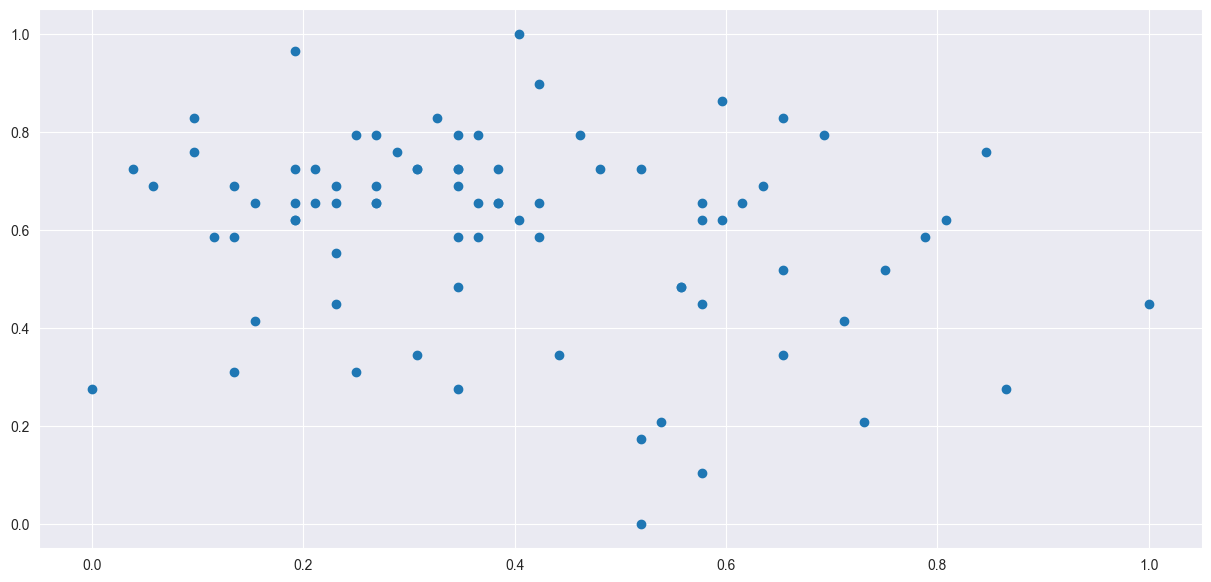

In [100]:
plt.scatter(df4['Age'], df4['AlbuMin'])
plt.show()

[0.2500000000000001, 0.2422360248447205, 0.385, 0.421875, 0.44, 0.3159722222222222, 0.5217391304347826, 0.4375, 0.41964285714285715, 0.3695652173913044, 0.48136645962732927, 0.44010416666666663, 0.39814814814814814, 0.5125000000000001, 0.4921875, 0.42824074074074076, 0.44400000000000006, 0.4, 0.41666666666666663, 0.3956521739130435, 0.46304347826086956, 0.46739130434782605, 0.42045454545454547, 0.43260869565217386, 0.4318181818181818, 0.45434782608695645, 0.4696969696969698, 0.45959595959595967, 0.4318181818181819, 0.42272727272727273, 0.4326086956521739, 0.45833333333333337, 0.46249999999999997, 0.40530303030303033, 0.40711462450592883, 0.3698347107438017, 0.38016528925619847, 0.39256198347107446, 0.3966942148760331, 0.38311688311688324, 0.38999999999999996, 0.45, 0.43999999999999995, 0.42499999999999993, 0.37500000000000006, 0.4327485380116959, 0.43000000000000005, 0.42894736842105263, 0.4738095238095238, 0.46190476190476193, 0.39722222222222225, 0.4290123456790124, 0.454999999999999

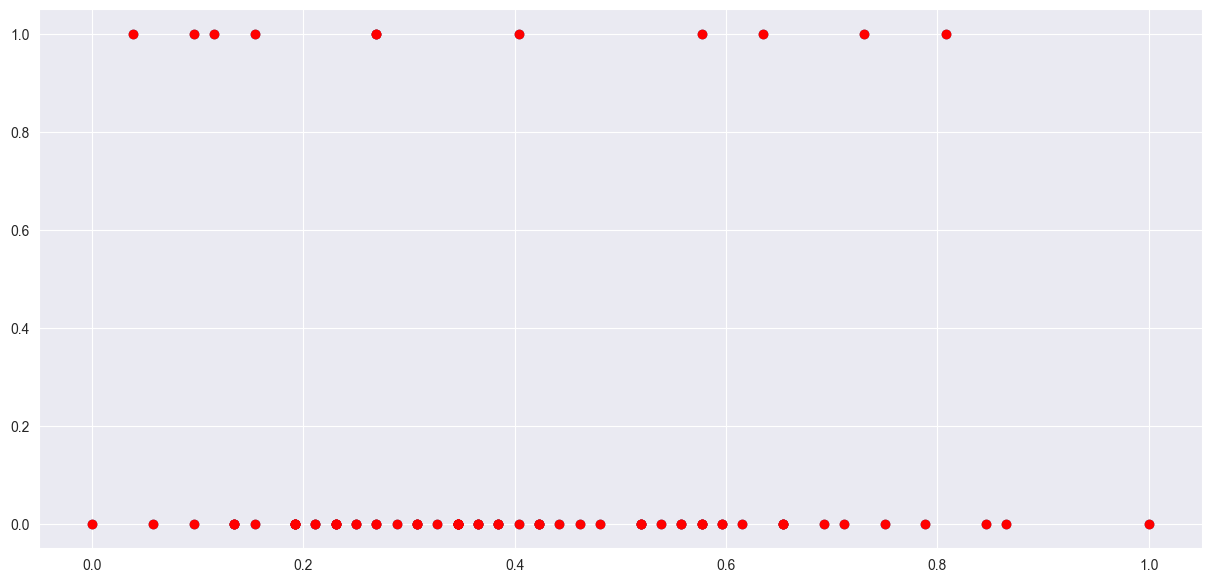

In [101]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)


def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,71):
    knn, distReturn = main(X, y, v)

    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.7,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (((y == 1).sum()))), ((y[newArr] != 1).sum() / ((y != 1).sum()))])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(tots, tots.index(max(tots))+2,max(tots))
print(newArr)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1],color='red')
plt.show()

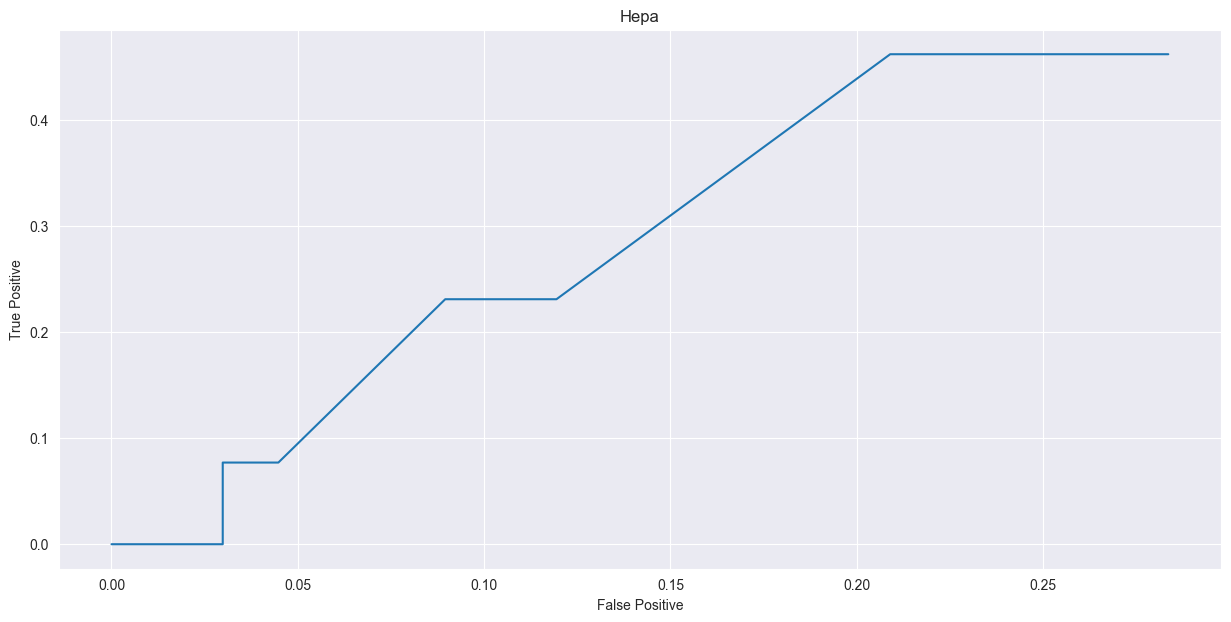

-0.08036739380022963


In [102]:
posNeg4 = np.array(posNeg4)
plt.plot(posNeg4[:,1], posNeg4[:,0])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Hepa")
plt.show()
print(integrate.trapezoid(posNeg4[:,0], x=posNeg4[:,1]))

In [103]:
total4 = integrate.trapezoid(posNeg4[:,0], x=posNeg4[:,1] / (posNeg4[0][0]*posNeg4[0][1])) * -100
print(total4)

61.40350877192983


In [104]:
arff_file = arff.loadarff('./real/Arrhythmia_withoutdupl_norm_46.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att271,att272,att273,att274,att276,att277,att278,att279,outlier,id
0,0.903614,0.0,0.125926,0.435294,0.270677,0.368321,0.501805,0.241758,0.590244,0.457478,...,1.000000,0.381356,0.968531,0.0,0.53125,0.741667,0.507519,0.569579,b'yes',1.0
1,0.674699,1.0,0.088889,0.341176,0.195489,0.332061,0.610108,0.150183,0.190244,0.577713,...,1.000000,0.360169,1.000000,0.0,0.31250,0.675000,0.485714,0.500971,b'yes',2.0
2,0.650602,0.0,0.099259,0.523529,0.624060,0.311069,0.555957,0.282051,0.497561,0.785924,...,1.000000,0.402542,0.916084,0.0,0.34375,0.783333,0.424812,0.566990,b'yes',3.0
3,0.662651,0.0,0.103704,0.517647,0.338346,0.385496,0.534296,0.260073,0.697561,0.586510,...,1.000000,0.516949,0.923077,0.0,0.37500,0.716667,0.592481,0.648544,b'no',4.0
4,0.156627,0.0,0.094815,0.264706,0.338346,0.318702,0.321300,0.241758,0.443902,0.818182,...,0.853659,0.516949,0.902098,0.0,0.53125,0.683333,0.433835,0.451133,b'yes',6.0


[0.7157894736842105, 0.7347813238770685, 0.6895833333333333, 0.7156894329896908, 0.7193943298969071, 0.7454637096774194, 0.7349004804392587, 0.7335082458770614, 0.7358422939068101, 0.7662176533144275, 0.754029304029304, 0.7489130434782609, 0.752014652014652, 0.7600732600732601, 0.7400674662668666, 0.7289068231841527, 0.7384751773049645, 0.7373007044864663, 0.735632183908046, 0.7345198368557656, 0.7166467542811628, 0.7222222222222222, 0.7143420015760441, 0.7105988967691095, 0.7135338345864661, 0.7317588325652841, 0.7256073277578654, 0.7143420015760441, 0.7145390070921986, 0.7076023391812865, 0.7242134607726005, 0.7254082039028276, 0.7264038231780168, 0.7281959378733572, 0.7256073277578654, 0.7256073277578654, 0.7305854241338113, 0.7289924332935085, 0.7331740342493032, 0.7407834101382488, 0.7403993855606759, 0.7434715821812595, 0.7465437788018432, 0.7476958525345623, 0.7515360983102919, 0.7478878648233487, 0.7395516717325228, 0.7461597542242704, 0.7467357910906298, 0.7446236559139785, 0.

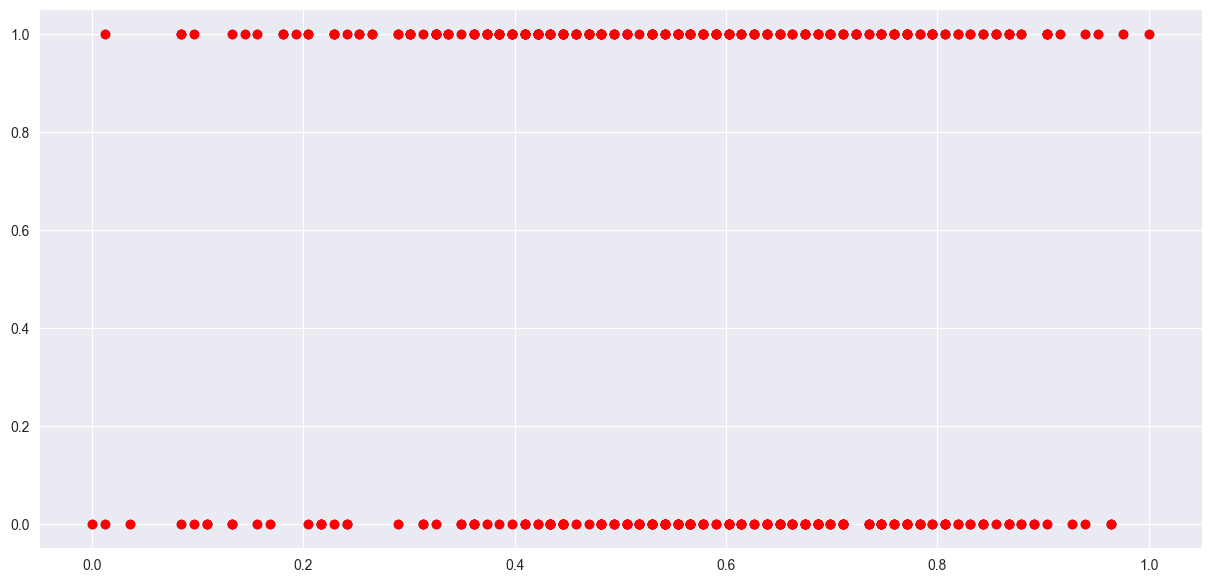

In [105]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,71):
    knn, distReturn = main(X, y, v)

    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.7,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([(y[newArr] == 1).sum(), (y[newArr] != 1).sum()])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(tots, tots.index(max(tots))+2,max(tots))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1],color='red')
plt.show()

In [106]:
arff_file = arff.loadarff('./real/HeartDisease_withoutdupl_norm_44.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,id,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,outlier
0,1.0,0.854167,1.0,1.000000,0.339623,0.447489,0.0,1.0,0.290076,0.0,0.387097,0.5,1.000000,0.0,b'yes'
1,2.0,0.791667,0.0,0.666667,0.198113,1.000000,0.0,1.0,0.679389,0.0,0.258065,0.5,0.000000,1.0,b'no'
2,3.0,0.583333,1.0,0.333333,0.283019,0.308219,0.0,0.0,0.534351,0.0,0.048387,0.0,0.000000,1.0,b'yes'
3,4.0,0.729167,1.0,1.000000,0.320755,0.312785,0.0,0.0,0.259542,1.0,0.032258,0.5,0.333333,1.0,b'no'
4,5.0,0.937500,0.0,0.333333,0.245283,0.326484,0.0,1.0,0.381679,1.0,0.032258,0.0,0.333333,0.0,b'no'


0.595829636202307 18


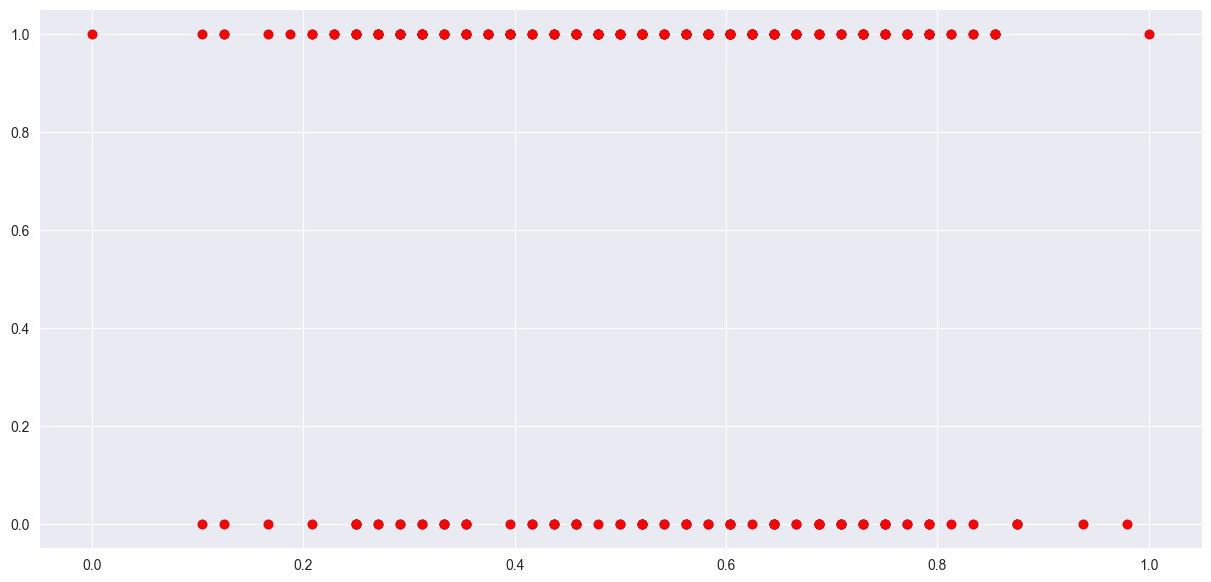

In [107]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.7,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([(y[newArr] == 1).sum(), (y[newArr] != 1).sum()])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots)))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1],color='red')
plt.show()

In [108]:
arff_file = arff.loadarff('./real/SpamBase_withoutdupl_norm_40.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att50,att51,att52,att53,att54,att55,att56,att57,id,outlier
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0.006007,0.017487,1.0,b'yes'
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0.010012,0.064836,2.0,b'yes'
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0.048458,0.142551,3.0,b'yes'
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0.003905,0.011995,4.0,b'yes'
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0.003905,0.011995,5.0,b'yes'


0.5191166435986904 2 [0.5191166435986904, 0.4912449635135891, 0.46694028096693124, 0.4759495586653479, 0.46907739148906036, 0.4652145127118644, 0.47206243471991566, 0.46189193446754884, 0.45882953441348706, 0.44436096929508817, 0.44091167567309886, 0.4370568269650839, 0.43294133828484976, 0.42758518363357073, 0.419328686985411, 0.41371494485955906, 0.4144470567228141, 0.4150814869071599, 0.41349720341477775, 0.4181947704891409, 0.4135460913629928, 0.40934905660377363, 0.4076574528702189, 0.40382331445276815, 0.4041523260986631, 0.4024529389548173, 0.4035484000160198, 0.39810298102981034, 0.39828170679234515, 0.39327218487020793, 0.39567552289429064, 0.3901319830596146, 0.3933996899400523, 0.39445194297167985, 0.39646686797118336, 0.3928709303821902, 0.39205007413075715, 0.3915604356936069, 0.39102858941150836, 0.39732347847101945, 0.3918908576791547, 0.3968768992099287, 0.3951373511761496, 0.40029292204686756, 0.40096214429786853, 0.3986601152419291, 0.39859894230010257, 0.399064645986

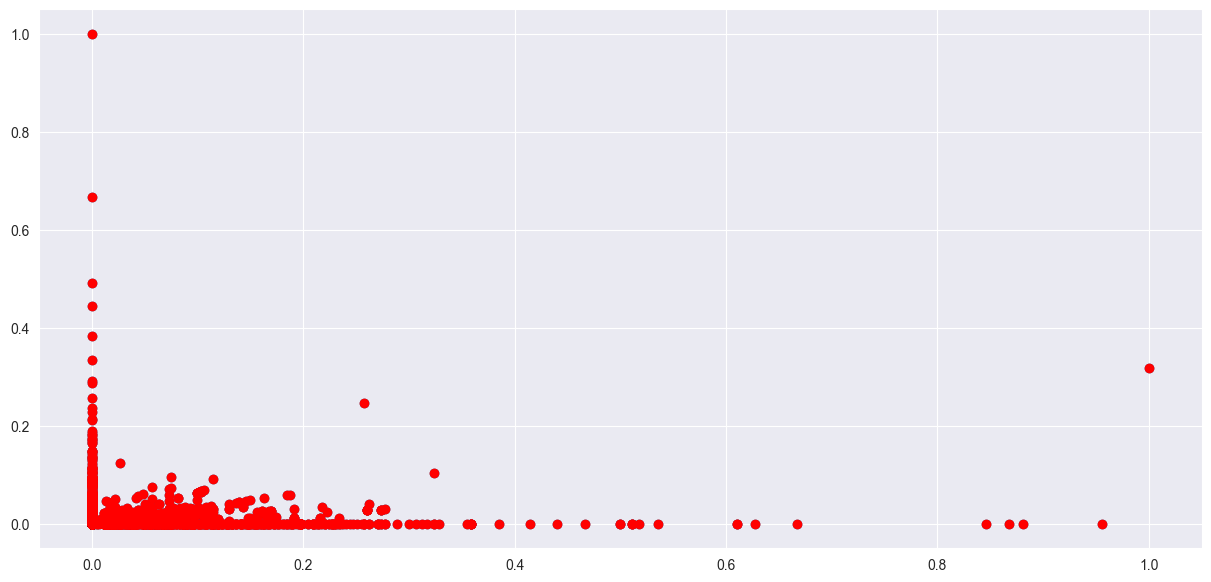

In [109]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.7,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([(y[newArr] == 1).sum(), (y[newArr] != 1).sum()])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots))+2,tots)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1],color='red')
plt.show()

In [110]:
from pyod.models.knn import KNN
clf = KNN(n_neighbors=63)
clf.fit(X)
pred = clf.predict_proba(X)
print(roc_auc_score(y, pred[:,1]))

0.5733146708031454


In [111]:
from pyod.models.lof import LOF
mld = LOF(n_neighbors=2)
mld.fit(X)
pred = mld.predict_proba(X)
print(roc_auc_score(y, pred[:,1]))

0.4673896551594153


In [112]:
from pyod.models.cof import COF
cof = COF(n_neighbors=2)
cof.fit(X)
pred = cof.predict_proba(X)
print(roc_auc_score(y, pred[:,1]))

0.4993091078550373


In [113]:
from pyod.models.abod import ABOD
abod2 = ABOD(n_neighbors=3)
abod2.fit(X)
pred = abod2.predict_proba(X)
print(roc_auc_score(y, pred[:,1]))

0.5


In [114]:
from PyNomaly import loop
m = loop.LocalOutlierProbability(X, n_neighbors=2).fit()
scores = m.local_outlier_probabilities
tmpArr = []
for c in scores:
    if c < .05:
        tmpArr += [1]
    elif c > .05:
        tmpArr += [0]
print(tmpArr)
print(scores)
print(roc_auc_score(y, tmpArr))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [133]:
arff_file = arff.loadarff('./real/Parkinson_withoutdupl_norm_75.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,id,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,outlier
0,1.0,0.184308,0.112592,0.054815,0.195680,0.249012,0.145472,0.247588,0.145288,0.312215,...,0.332584,0.068307,0.511745,0.369155,0.960148,0.569875,0.585765,0.390661,0.497310,b'yes'
1,2.0,0.198327,0.094930,0.278323,0.254130,0.288538,0.191233,0.323687,0.191042,0.472887,...,0.516048,0.059331,0.432577,0.470830,0.977024,0.703277,0.741337,0.473145,0.671326,b'yes'
2,3.0,0.165039,0.059128,0.265288,0.280178,0.328063,0.229287,0.369239,0.229411,0.390634,...,0.443317,0.039596,0.496220,0.404416,1.000000,0.636745,0.686371,0.408819,0.596682,b'yes'
3,4.0,0.165004,0.072927,0.264200,0.263342,0.328063,0.209056,0.324759,0.208862,0.414278,...,0.475478,0.040997,0.495936,0.416255,0.975885,0.695627,0.738089,0.436977,0.671949,b'yes'
4,5.0,0.161150,0.080909,0.260107,0.354511,0.407115,0.282755,0.437299,0.282870,0.499452,...,0.584542,0.054174,0.455499,0.375159,0.992813,0.762472,0.513798,0.404336,0.757611,b'yes'


In [135]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)

def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.7,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum() / (y != 1).sum()])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots))+2,tots)

0.8115808823529412 32 [0.6475155279503105, 0.5538194444444444, 0.6547619047619049, 0.6026785714285714, 0.5505226480836238, 0.459349593495935, 0.5085470085470086, 0.5131578947368423, 0.5635964912280702, 0.5811403508771931, 0.5833333333333333, 0.605263157894737, 0.6240601503759401, 0.6203007518796995, 0.6765873015873015, 0.6686507936507936, 0.6736111111111109, 0.7111111111111111, 0.7373737373737372, 0.7424242424242424, 0.7272727272727273, 0.6942857142857142, 0.7014705882352941, 0.7152406417112299, 0.713903743315508, 0.7668067226890757, 0.7587412587412588, 0.7813852813852814, 0.7781385281385281, 0.7673160173160172, 0.8115808823529412, 0.7802734375, 0.7858455882352943, 0.7922794117647058, 0.771043771043771, 0.7651515151515151, 0.7634680134680134, 0.7474747474747474, 0.7255892255892257, 0.7205387205387205, 0.6889483065953654, 0.6880570409982174, 0.6746880570409982, 0.661319073083779, 0.6746323529411764, 0.6700367647058822, 0.6755514705882353, 0.65625, 0.6565464895635675, 0.6612903225806452,

In [132]:
from pyod.models.knn import KNN
clf = KNN(n_neighbors=4)
clf.fit(X)
pred = clf.predict_proba(X)
print(roc_auc_score(y, pred[:,1]))

0.8693766937669377


In [118]:
from pyod.models.lof import LOF
mld = LOF(n_neighbors=6)
mld.fit(X)
pred = mld.predict_proba(X)
print(roc_auc_score(y, pred[:,1]))

0.6078514739229025


In [119]:
from pyod.models.cof import COF
cof = COF(n_neighbors=98)
cof.fit(X)
pred = cof.predict_proba(X)
print(roc_auc_score(y, pred[:,1]))

0.6041666666666667


In [120]:
from pyod.models.abod import ABOD
abod2 = ABOD(n_neighbors=15)
abod2.fit(X)
pred = abod2.predict_proba(X)
print(roc_auc_score(y, pred[:,1]))

0.6295351473922902


In [121]:
from PyNomaly import loop
m = loop.LocalOutlierProbability(X, n_neighbors=13).fit()
scores = m.local_outlier_probabilities
tmpArr = []
for c in scores:
    if c < .05:
        tmpArr += [1]
    elif c > .05:
        tmpArr += [0]
print(tmpArr)
print(scores)
print(roc_auc_score(y, tmpArr))

[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1]
[0.1616536528786868 0.3040017945246583 0.1516069371993118
 0.23351773626528252 0.6137726289096684 0.07021767941766757
 0.14556918924963488 0.24472695434763725 0.03731118790853036 0.0
 0.3068447078544365 0.15925034661036983 0.16043677050143898 0.0
 0.07661938721459509 0.026885176524599697 0.214274514080207
 0.5829465086471909 0.20312430908729084 0.07302775416476952
 0.10047141085523935 0.0 0.08967152313629195 0.

In [137]:
arff_file = arff.loadarff('./real/Glass_withoutdupl_norm.arff')
#arff_file = arff.loadarff('./clusters/real-world/iris.arff')
df4 = pd.DataFrame(arff_file[0])
df4.head()

,var_0000,var_0001,var_0002,var_0003,var_0004,var_0005,var_0006,id,outlier
0,0.467651,0.321584,0.768880,0.246630,0.838799,0.099737,0.298340,1.0,b'no'
1,0.496412,0.220491,0.776032,0.316598,0.919973,0.089145,0.279479,2.0,b'no'
2,0.519133,0.404464,0.768012,0.334978,0.801622,0.092369,0.271238,3.0,b'no'
3,0.199650,0.547373,0.374284,0.362223,0.817017,0.000000,0.177913,4.0,b'yes'
4,0.847261,0.286361,0.000000,0.217792,0.000000,0.019135,1.000000,5.0,b'no'


[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
0.823170731707317 61 [0.24999999999999997, 0.2670454545454545, 0.3221153846153846, 0.5, 0.4791666666666667, 0.46739130434782616, 0.4791666666666667, 0.48, 0.4375, 0.39583333333333337, 0.34782608695652184, 0.34782608695652184, 0.36956521739130443, 0.3854166666666667, 0.4, 0.37500000000000006, 0.34782608695652184, 0.4, 0.4000000000000001, 0.4000000000000001, 0.41000000000000003, 0.37500000000000006, 0.38541666666666663, 0.35869565217391314, 0.3958333333333333, 0.34782608695652184, 0.2954545454545454, 0.28409090909090906, 0.27272727272727265, 0.22727272727272724

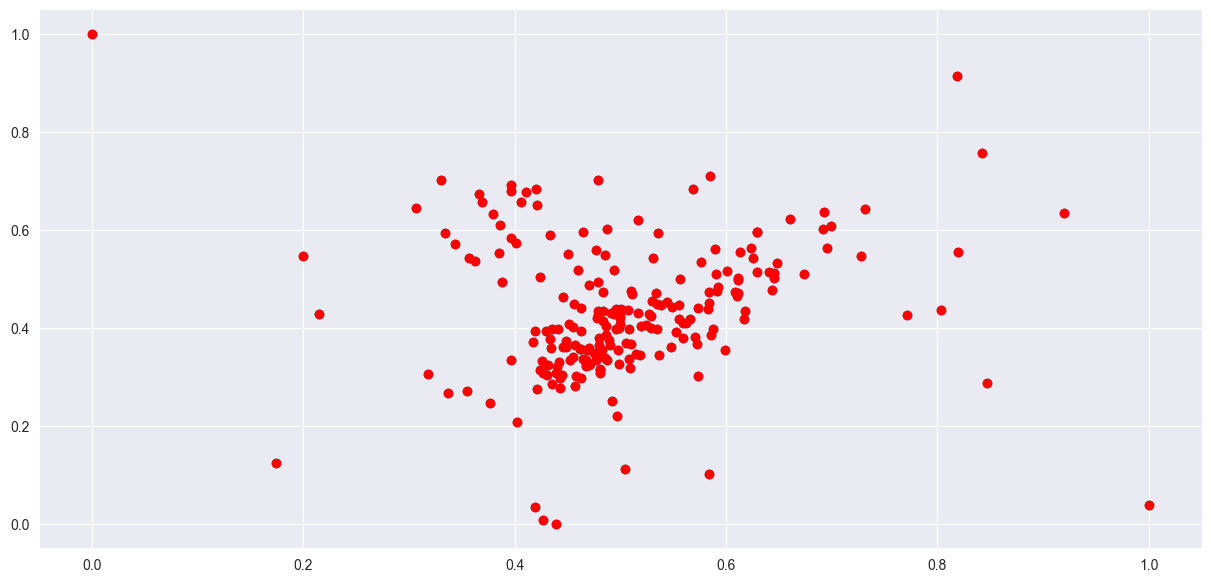

In [141]:
X = df4.drop(columns=['outlier','id']).values
y = df4['outlier'].values
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
def main(X, y, n):
    nn = NearestNeighbors(n_neighbors=n)
    nn.fit(X, y)
    dist, knn = nn.kneighbors(X)  # returns N index neighbors including self
    return knn, dist

def generateArr(newDist, median='median'):
    arr = []
    for x in newDist:  # finds the distance away from that point (index 0)
        if median == 'median':
            arr += [np.median(x)]
        elif median == 'sum':  # min + median + max
            arr += [x[1] + np.max(x) + np.median(x)]
        elif median == 'max':
            arr += [np.max(x)]
        elif median == 'minMax':
            arr += [np.max(x) + x[1]]
        elif median == 'medMax':
            arr += [np.median(x) + np.max(x)]
        elif median == 'min':
            arr += [x[1]]

    return arr

tots = []

for v in range(2,110):
    knn, distReturn = main(X, y, v)
    distReturn = np.array(distReturn)
    arr = generateArr(distReturn, median="medMax")
    arr = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))
    means = np.mean(arr)
    inMean = 1 / means
    posNeg4 = []
    spaceStep4 = np.linspace(.9,.99,20)
    for e in spaceStep4:
        ker = -means * np.log(1 - e)
        f = integrate.quad(lambda x: inMean * np.exp(-x * inMean), 0, ker)
        newArr = arr > ker
        posNeg4.append([((y[newArr] == 1).sum() / (y == 1).sum()), (y[newArr] != 1).sum()/ ((y != 1).sum())])

    posNeg4 = np.array(posNeg4)
    arrtest1, arrtest2 = np.split(posNeg4, 2,axis=1)
    arrtest1 = arrtest1.flatten()
    arrtest2 = arrtest2.flatten()
    arrtest1 = (arrtest1-np.min(arrtest1))/(np.max(arrtest1)-np.min(arrtest1))
    arrtest2 = (arrtest2-np.min(arrtest2))/(np.max(arrtest2))
    tots += [integrate.trapezoid(arrtest1, x=-arrtest2)]

print(max(tots),tots.index(max(tots)),tots)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[:, 0], X[:, 1],color='red')
plt.show()